<a href="https://colab.research.google.com/github/mar-roige/GIS-course/blob/master/Exercise5NotebookMar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
!pip install fiona
!pip install geopandas

import pandas as pd
import requests
import fiona
import geopandas as gpd
import ipywidgets as widgets

     |████████████████████████████████| 11.8MB 199kB/s 
     |████████████████████████████████| 921kB 9.5MB/s 
     |████████████████████████████████| 10.1MB 19.2MB/s 


In [0]:
url = 'http://ropitz.github.io/digitalantiquity/data/gabii_SU.geojson'

request = requests.get(url)
b = bytes(request.content)
with fiona.BytesCollection(b) as f:
  crs = f.crs
  gabii_su_poly = gpd.GeoDataFrame.from_features(f, crs=crs)
  print(gabii_su_poly.head())

                                            geometry  ...  Shape_Area
0  POLYGON Z ((1415906.023 5144201.194 64.774, 14...  ...    0.030028
1  POLYGON Z ((1415940.483 5144159.515 62.910, 14...  ...    0.567181
2  POLYGON Z ((1415956.547 5144171.764 62.566, 14...  ...    0.030045
3  POLYGON Z ((1415955.891 5144171.889 62.624, 14...  ...    0.030902
4  POLYGON Z ((1415956.267 5144171.289 62.618, 14...  ...    0.170833

[5 rows x 6 columns]


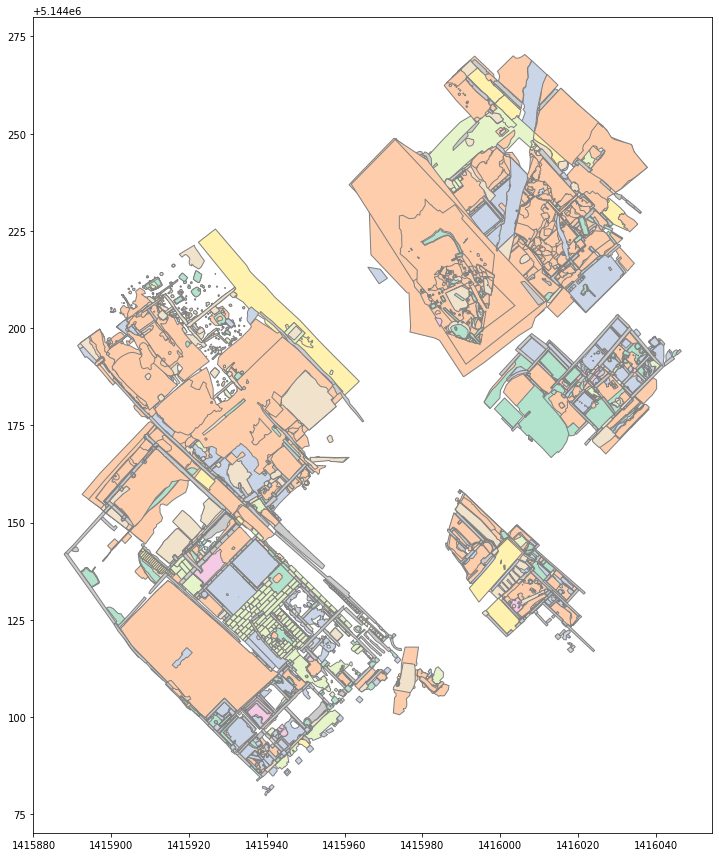

In [0]:
gabii_map1 = gabii_su_poly.plot(column='DESCRIPTIO', cmap='Pastel2', edgecolor='grey', figsize=(15, 15))

In [0]:
sf_su = pd.read_csv("https://raw.githubusercontent.com/ropitz/gabii_experiments/master/spf_SU.csv")
sf_su

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
3,0,80,ceramic fragment,Ceramic Fragment
4,0,82,fish hook,NaN
...,...,...,...,...
2639,8365,2749,Bronze hair pin,Pin
2640,8365,2751,Lead Weight,Metal Object
2641,8365,2758,african red slip fragment with a moulded face.,Ceramic Fragment
2642,8375,2720,Iron blade,Blade


In [0]:
sf_su_desc = sf_su['SF_OBJECT_TYPE']
set(sf_su_desc)

{' Area B',
 ' Area H"',
 ' along with a crescent (maybe a boat?). Weight 1.370 kg. Large fragment of buff colored tile with red inclusions. Photo model completed by Thomas Kocjan during the AAR Digital Documentation session in 2017."',
 ' given its characteristic fabric and bulging toe. Situated just above the toe is an upside-down gamma-shaped incision (appears like a backwards L with toe pointed downwards). Peacock & Williams (1986) pp. 155-157 place the production dates of these amphora between the late second century and late fourth century AD (which fits with other material from SU)."',
 ' hole drilled in break"',
 ' indicating that the stamp was produced in the year of the consuls Apronianus and Paetinus in 123 CE. The lower line reads ""*EV" likely indicating the name of the workshop"',
 ' possibly the bulk excavated section from which other chain pieces were microexcavated. "',
 ' the conservator (check?)) with cylindrical silver/bronze beads inside. ',
 ' topo point taken.',


In [51]:
types = ['Game Piece', 'Die', 'Coin']
games = sf_su.loc[sf_su['SF_OBJECT_TYPE'].isin(types)]
games

,SU,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,0,1,coin,Coin
1,0,15,coin,Coin
2,0,18,coin,Coin
5,0,83,coin,Coin
6,0,84,coin,Coin
...,...,...,...,...
2610,8309,2654,Bronze Coin,Coin
2626,8318,2747,Bronze coin,Coin
2629,8334,2681,Bronze coin,Coin
2632,8334,2688,Small bronze coin.,Coin


In [52]:
pd.value_counts(games['SU'].values, sort=True)

0       54
6044    11
5817    10
7211    10
5622     7
        ..
8187     1
4397     1
4398     1
5052     1
4396     1
Length: 131, dtype: int64

In [53]:
gabii_gamestuff = gabii_su_poly.merge(games, on='SU')
gabii_gamestuff.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,329,coin,Coin
1,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,23,coin,Coin
2,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,2524,Black gloss gaming piece,Game Piece
3,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,287,gaming piece - die,Game Piece
4,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,597,game piece,Game Piece


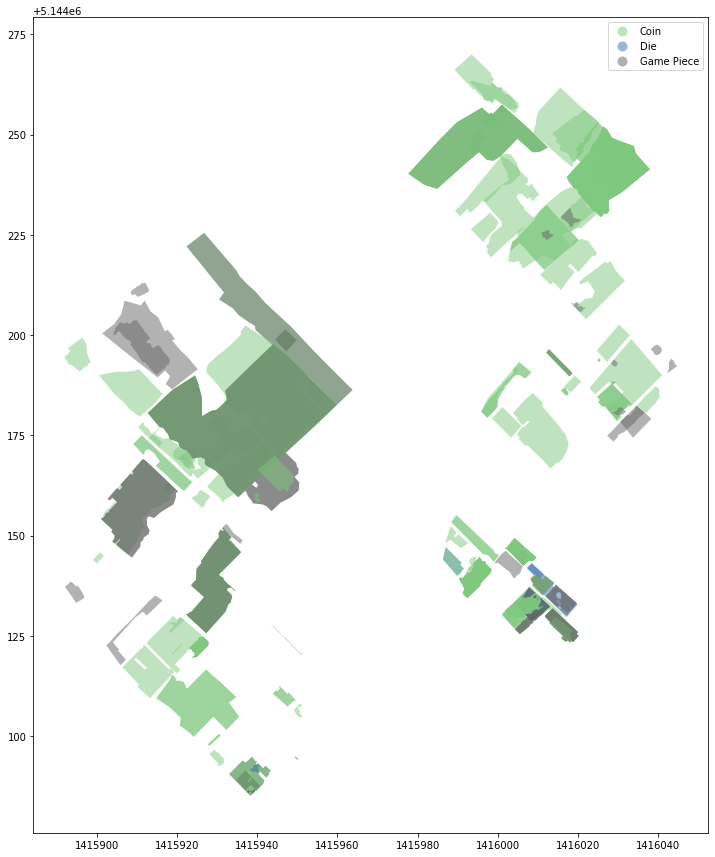

In [54]:
gabii_gamestuff.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [55]:
gabii_gamestuff.sort_values(by=['Shape_Area'], ascending=False)

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,SF_ID,SF_DESCRIPTION,SF_OBJECT_TYPE
70,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,2571,Black gloss game piece,Game Piece
69,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,269,coin,Coin
66,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,90,coin,Coin
68,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,221,coin,Coin
67,"POLYGON Z ((1415912.768 5144180.563 64.614, 14...",1886,DEP,1016,140.946953,836.932636,102,coin,Coin
...,...,...,...,...,...,...,...,...,...
117,"POLYGON Z ((1415949.251 5144094.781 59.510, 14...",4404,FILL,5694,2.904176,0.368066,1399,Commonware game piece,Game Piece
61,"POLYGON Z ((1415926.128 5144165.872 63.105, 14...",1750,TOP,1231,1.383808,0.133112,409,Coin (AE) - double litra,Coin
205,"POLYGON Z ((1416006.287 5144135.281 0.000, 141...",5924,FILL,7107,1.263433,0.113701,2173,Bronze coin,Coin
57,"POLYGON Z ((1415929.409 5144181.776 63.832, 14...",1380,TOP,1237,0.470778,0.016258,194,coin,Coin


In [0]:
gabii_gamestuff2 = gabii_gamestuff.loc[gabii_gamestuff['Shape_Area']<800]

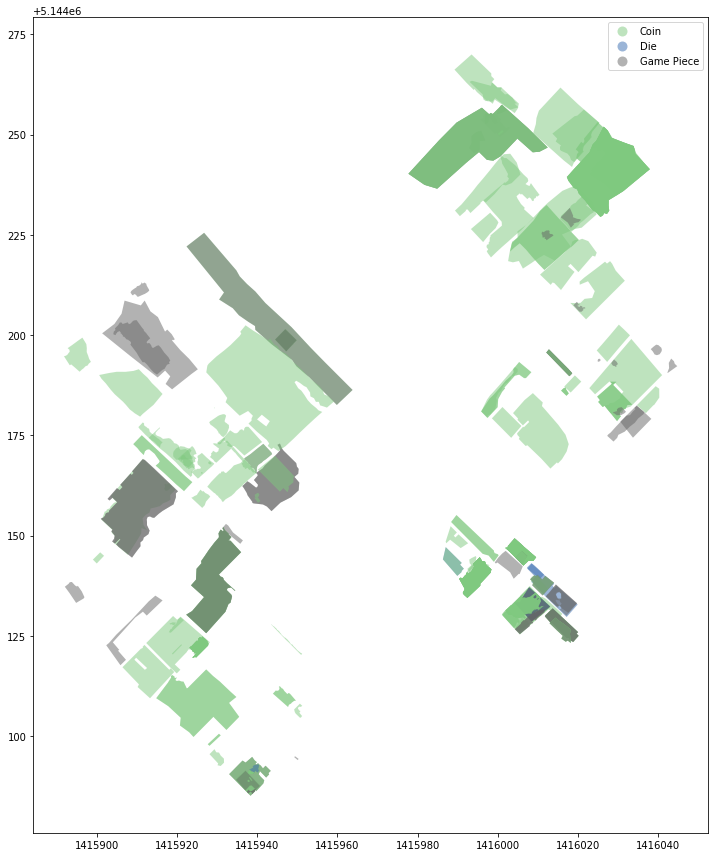

In [57]:
gabii_gamestuff2.plot(column='SF_OBJECT_TYPE', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5)

In [58]:
gamestuff_counts = gabii_gamestuff2.groupby('SU')['SF_OBJECT_TYPE'].value_counts().unstack().fillna(0)
gamestuff_counts.sort_values(by=['Game Piece', 'Die', 'Coin'], ascending=False)

SF_OBJECT_TYPE,Coin,Die,Game Piece
SU,,,
7030,4.0,2.0,4.0
2000,16.0,0.0,4.0
8000,3.0,0.0,3.0
5314,3.0,0.0,2.0
7077,3.0,0.0,2.0
...,...,...,...
8001,1.0,0.0,0.0
8033,1.0,0.0,0.0
8143,1.0,0.0,0.0


In [61]:
gabii_gamestuff_counts = gabii_su_poly.merge(gamestuff_counts, on='SU')
gabii_gamestuff_counts.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Coin,Die,Game Piece
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,1.0,0.0,0.0
1,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,1.0,0.0,1.0
2,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,0.0,0.0,2.0
3,"POLYGON Z ((1416023.481 5144233.147 61.349, 14...",202,DEP,2222,69.355390,221.677458,1.0,0.0,0.0
4,"POLYGON Z ((1416018.380 5144225.643 61.408, 14...",226,DEP,2228,50.451643,129.311389,2.0,0.0,0.0


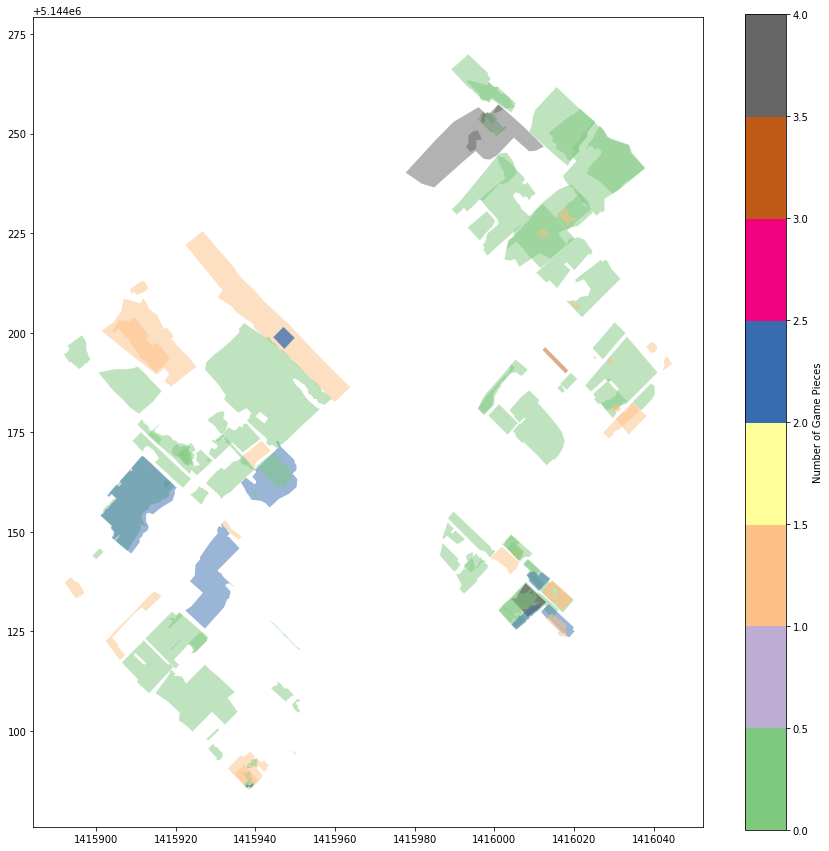

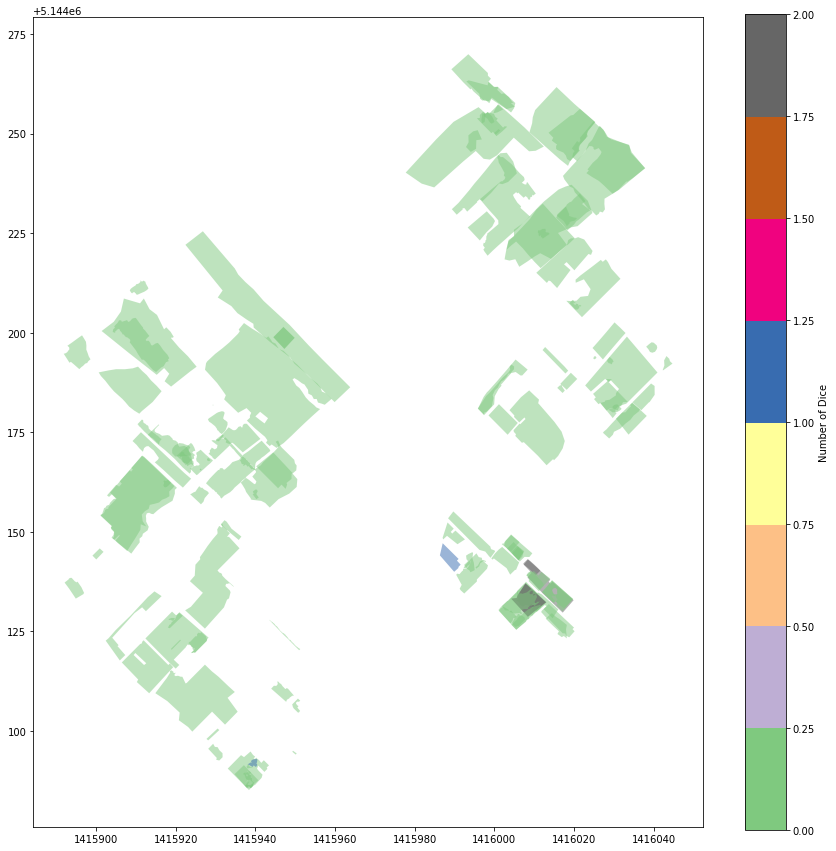

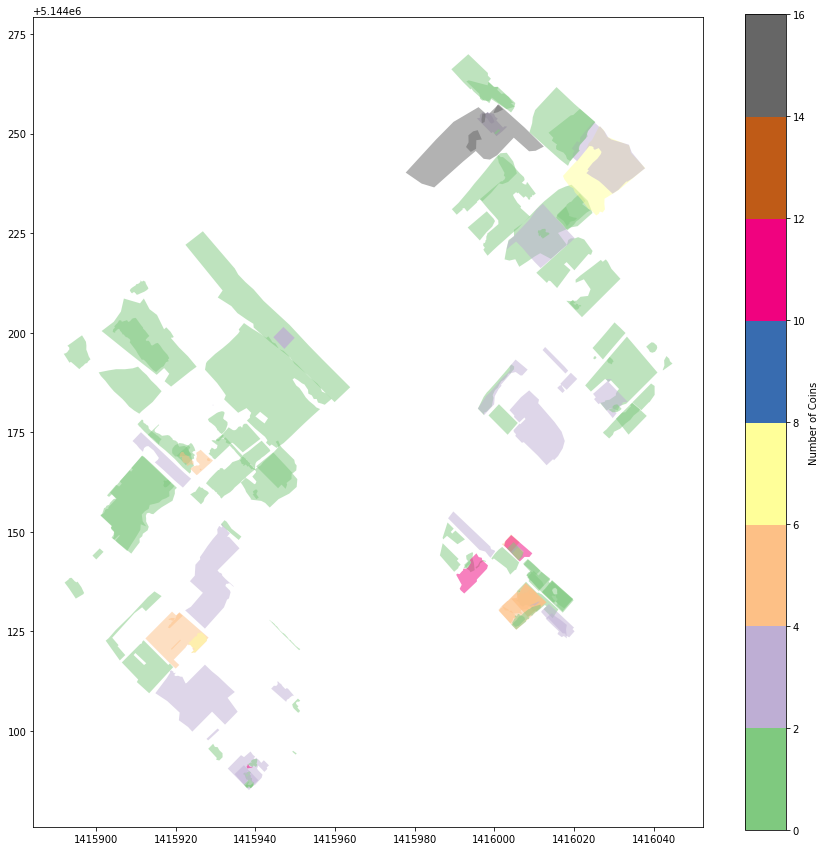

In [62]:
gabii_gamestuff_counts.plot(column='Game Piece', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Game Pieces",'orientation': "vertical"})
gabii_gamestuff_counts.plot(column='Die', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Dice",'orientation': "vertical"})
gabii_gamestuff_counts.plot(column='Coin', cmap='Accent', figsize=(15, 15), legend=True, alpha=0.5, legend_kwds={'label': "Number of Coins",'orientation': "vertical"})

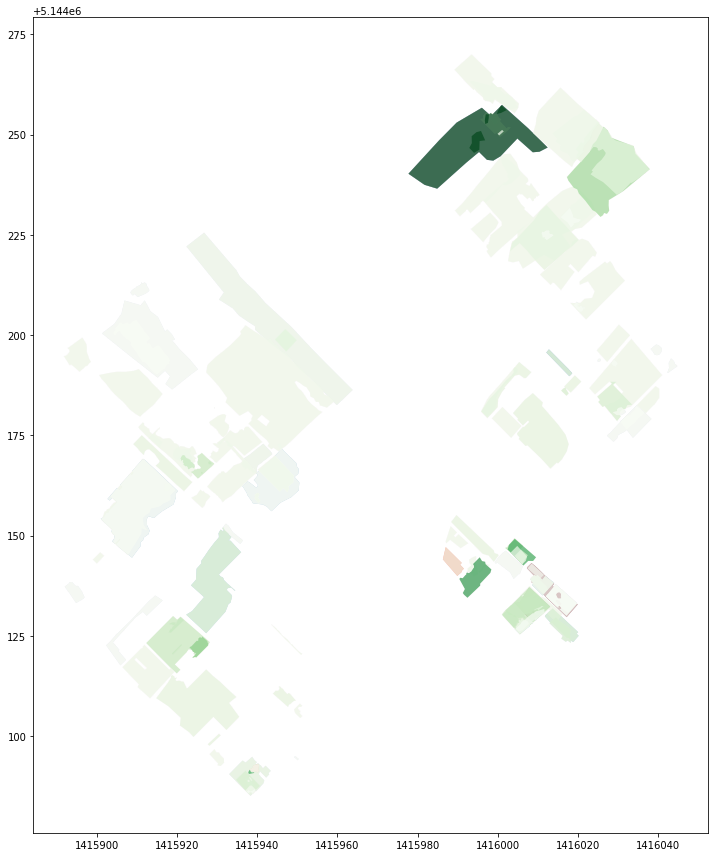

In [63]:
base = gabii_gamestuff_counts.plot(column='Game Piece', cmap='Blues', figsize=(15, 15), alpha=0.7)
gabii_gamestuff_counts.plot(ax=base, column='Die', cmap='Reds', alpha=0.7)
gabii_gamestuff_counts.plot(ax=base, column='Coin', cmap='Greens', alpha=0.7)

In [0]:
import matplotlib.pyplot as plt

(1415884.2150949999, 1416052.398605, 5144075.906270001, 5144279.19573)

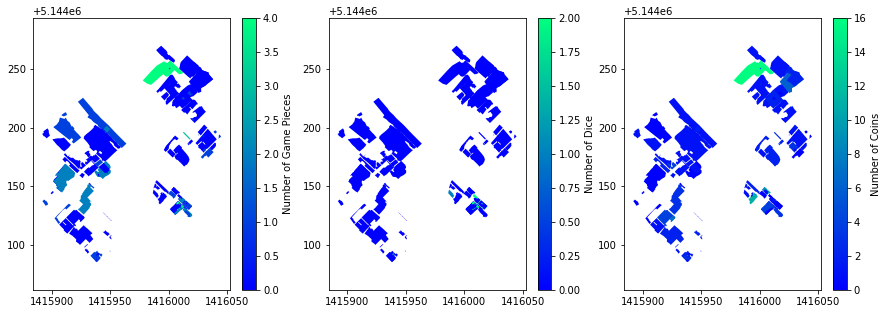

In [65]:
fig, axes = plt.subplots(ncols=3,figsize=(15, 5))
gabii_gamestuff_counts.plot(column='Game Piece', cmap='winter',  ax=axes[0], legend=True, legend_kwds={'label': "Number of Game Pieces",'orientation': "vertical"}).axis('equal')
gabii_gamestuff_counts.plot(column='Die', cmap='winter', ax=axes[1], legend=True, legend_kwds={'label': "Number of Dice",'orientation': "vertical"}).axis('equal')
gabii_gamestuff_counts.plot(column='Coin', cmap='winter',ax=axes[2], legend=True, legend_kwds={'label': "Number of Coins",'orientation': "vertical"}).axis('equal')

In [66]:
!apt-get install -qq curl g++ make
#@title
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
#@title
import os
os.chdir('spatialindex-src-1.8.5')
#@title
!./configure
#@title
!make
#@title
!make install
#@title
!pip install rtree
#@title
!ldconfig
#Working through the example at http://toblerity.org/rtree/examples.html
#@title
from rtree import index
from rtree.index import Rtree
#@title
p = index.Property()
idx = index.Index(properties=p)
idx

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0   422k      0  0:00:01  0:00:01 --:--:--  422k
checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compil

In [67]:
!pip install pysal
import pysal
from sklearn import cluster
import seaborn as sns
import numpy as np

     |████████████████████████████████| 25.0MB 93kB/s 
  Created wheel for pysal: filename=pysal-2.1.0-py2.py3-none-any.whl size=25330028 sha256=e5ac58f2cb51f6531ba1fe238bc0c5119ddf3a0507766a581b2686169f3b9dfa
  Stored in directory: /root/.cache/pip/wheels/d3/83/3d/697615f4ce74486679f237d1d6a1cf70cd742fa6a34baba744
Successfully built pysal


/usr/local/lib/python3.6/dist-packages/pysal/explore/segregation/network/network.py:16: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  "You need pandana and urbanaccess to work with segregation's network module\n"


In [69]:
km5 = cluster.KMeans(n_clusters=5)
km5cls = km5.fit(gabii_gamestuff_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
km5cls

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

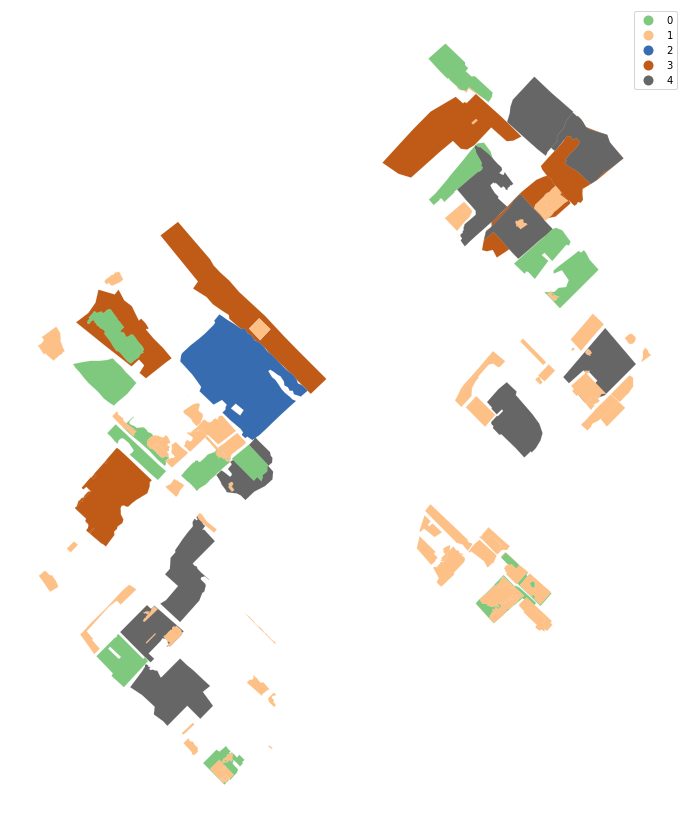

In [71]:
f1, ax = plt.subplots(1, figsize=(15, 15))
gabii_gamestuff_counts.assign(cl=km5cls.labels_)\
.plot(column='cl', categorical=True, legend=True, \
      linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)
ax.set_axis_off()
plt.show()

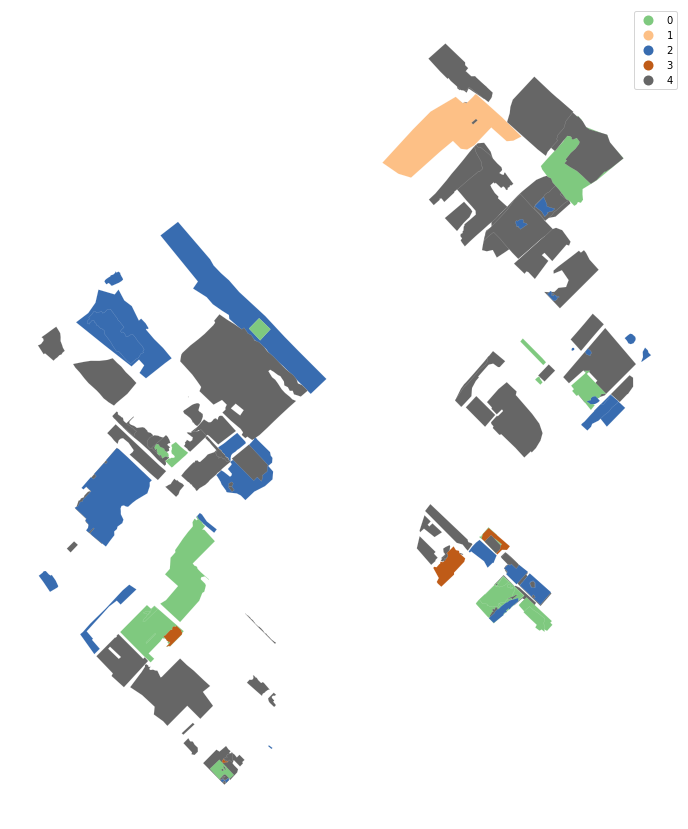

In [72]:
km5 = cluster.KMeans(n_clusters=5)
km5cls2 = km5.fit(gabii_gamestuff_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)

f2, ax = plt.subplots(1, figsize=(15,15))

gabii_gamestuff_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

(1415884.2150949999, 1416052.398605, 5144075.906270001, 5144279.19573)

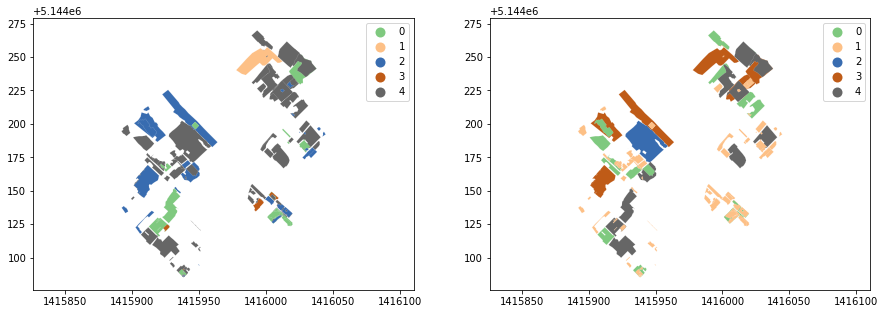

In [73]:
fig, axes = plt.subplots(ncols=2,figsize=(15, 5))


gabii_gamestuff_counts.assign(cl2=km5cls2.labels_)\
   .plot(column='cl2', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[0]).axis('equal')
gabii_gamestuff_counts.assign(cl=km5cls.labels_)\
   .plot(column='cl', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=axes[1]).axis('equal')

In [75]:
gabiigamestuff_clas = gabii_gamestuff_counts.assign(cl=km5cls.labels_)
gabiigamestuff_class = gabiigamestuff_clas.assign(cl2=km5cls2.labels_)


gabiigamestuff_class.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Coin,Die,Game Piece,cl,cl2
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,1.0,0.0,0.0,0,4
1,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,1.0,0.0,1.0,3,2
2,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,0.0,0.0,2.0,4,2
3,"POLYGON Z ((1416023.481 5144233.147 61.349, 14...",202,DEP,2222,69.355390,221.677458,1.0,0.0,0.0,3,4
4,"POLYGON Z ((1416018.380 5144225.643 61.408, 14...",226,DEP,2228,50.451643,129.311389,2.0,0.0,0.0,4,4


(1415906.0894999998, 1416044.1636999997, 5144078.214825001, 5144260.220275)

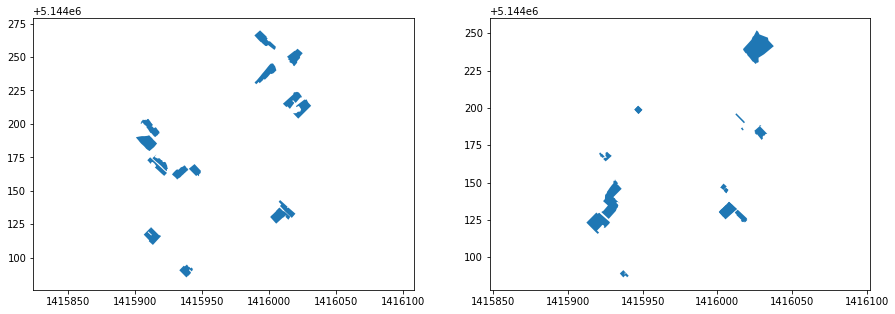

In [76]:
gabiigamestuff_class0=gabiigamestuff_class.loc[gabiigamestuff_class['cl']==0]
gabiigamestuff_class0noarea=gabiigamestuff_class.loc[gabiigamestuff_class['cl2']==0]

fig, axes = plt.subplots(ncols=2,figsize=(15, 5))
gabiigamestuff_class0.plot(ax=axes[0], legend=True).axis('equal')
gabiigamestuff_class0noarea.plot(ax=axes[1]).axis('equal')

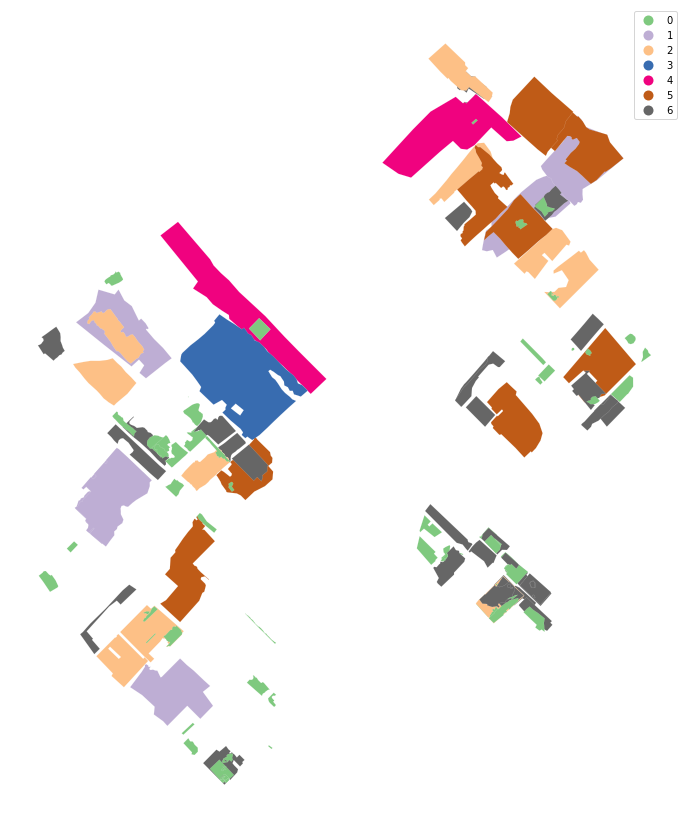

In [77]:
km7 = cluster.KMeans(n_clusters=7)
km7cls3 = km7.fit(gabii_gamestuff_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU'], axis=1).values)
f3, ax = plt.subplots(1, figsize=(15,15))

gabii_gamestuff_counts.assign(cl3=km7cls3.labels_)\
   .plot(column='cl3', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

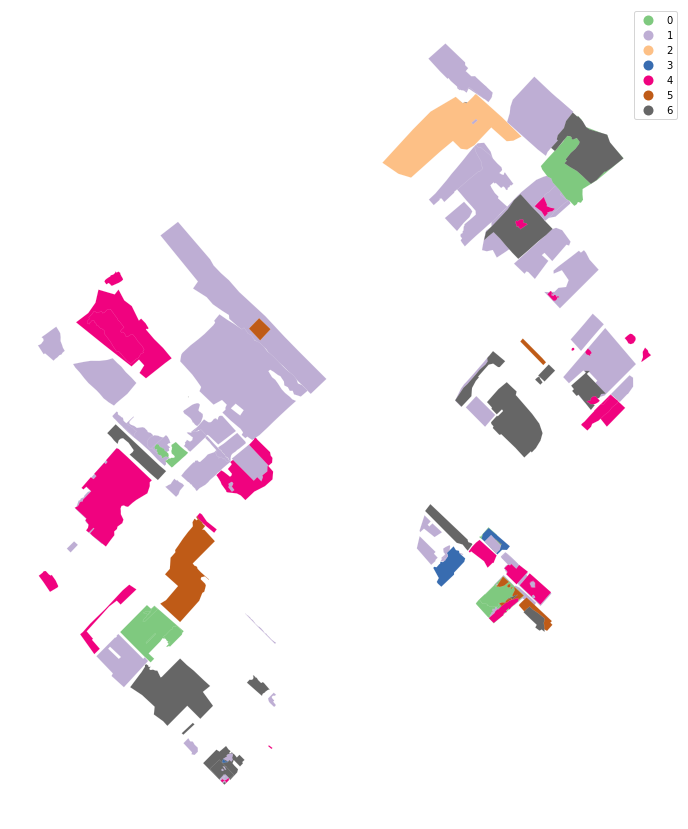

In [78]:
km7 = cluster.KMeans(n_clusters=7)
km7cls4 = km7.fit(gabii_gamestuff_counts.drop(['geometry', 'OBJECTID','DESCRIPTIO','Shape_Length','SU','Shape_Area'], axis=1).values)
f4, ax = plt.subplots(1, figsize=(15,15))

gabii_gamestuff_counts.assign(cl4=km7cls4.labels_)\
   .plot(column='cl4', categorical=True, legend=True, \
         linewidth=0.1, cmap='Accent', edgecolor='white', ax=ax)

ax.set_axis_off()

plt.show()

In [79]:
gabiigamestuff_class3=gabiigamestuff_class.assign(cl3=km7cls3.labels_)
gabiigamestuff_class4=gabiigamestuff_class3.assign(cl4=km7cls4.labels_)
gabiigamestuff_class4.head()

,geometry,OBJECTID,DESCRIPTIO,SU,Shape_Length,Shape_Area,Coin,Die,Game Piece,cl,cl2,cl3,cl4
0,"POLYGON Z ((1416013.191 5144212.531 61.348, 14...",28,DEP,2258,45.450094,77.018159,1.0,0.0,0.0,0,4,2,1
1,"POLYGON Z ((1415922.417 5144222.089 64.100, 14...",42,RD,51,121.745099,325.393894,1.0,0.0,1.0,3,2,4,1
2,"POLYGON Z ((1415936.349 5144162.362 63.122, 14...",115,DEP,1327,52.841679,122.494594,0.0,0.0,2.0,4,2,5,4
3,"POLYGON Z ((1416023.481 5144233.147 61.349, 14...",202,DEP,2222,69.355390,221.677458,1.0,0.0,0.0,3,4,1,1
4,"POLYGON Z ((1416018.380 5144225.643 61.408, 14...",226,DEP,2228,50.451643,129.311389,2.0,0.0,0.0,4,4,5,6


Text(0.5, 1, '7 clusters - no area')

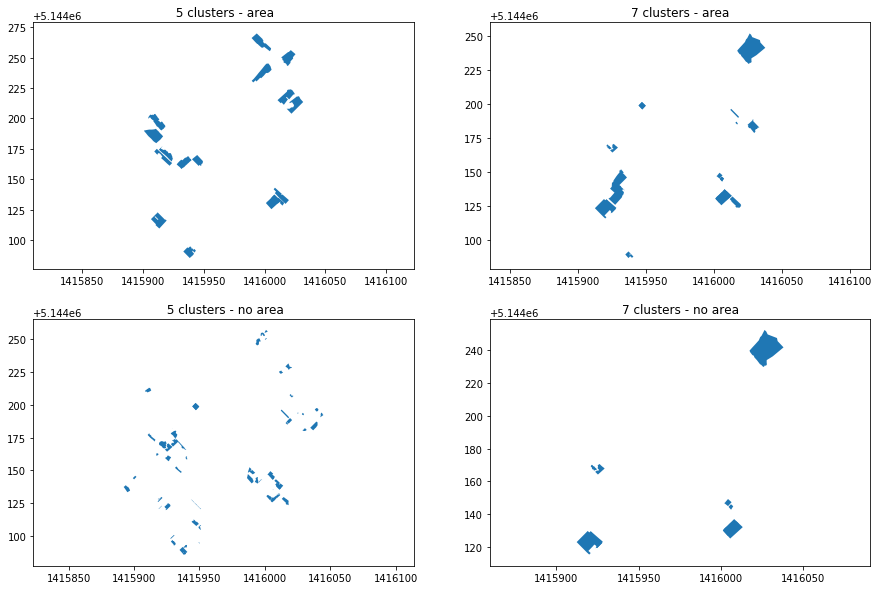

In [81]:
gabiigamestuff_class0=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl']==0]
gabiigamestuff_class0noarea=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl2']==0]
gabiigamestuff_k7_class0=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl3']==0]
gabiigamestuff_k7_class0noarea=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl4']==0]


fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))

gabiigamestuff_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title(' 5 clusters - area')


gabiigamestuff_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiigamestuff_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiigamestuff_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

Text(0.5, 1, '7 clusters - no area')

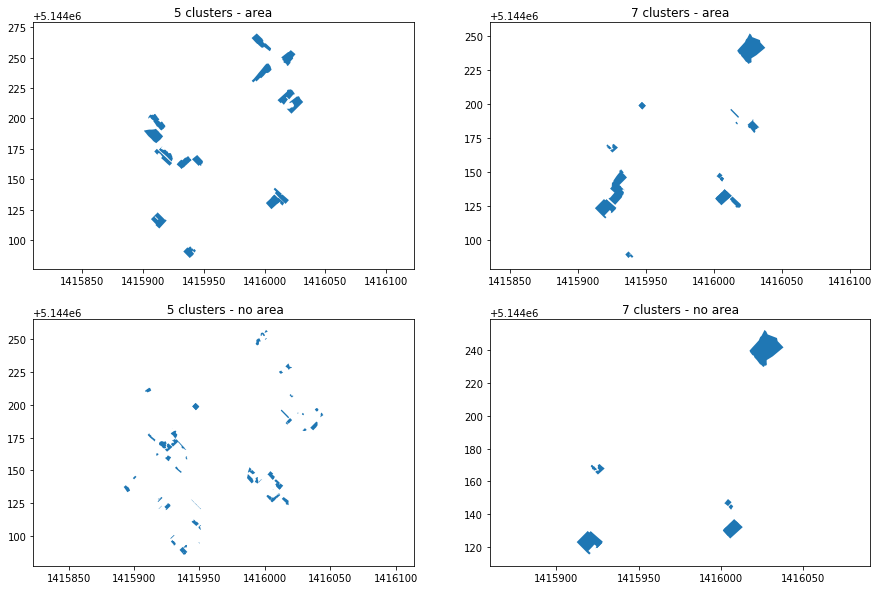

In [82]:
gabiigamestuff_class3=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl']==3]
gabiigamestuff_class3noarea=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl2']==3]
gabiigamestuff_k7_class3=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl3']==3]
gabiigamestuff_k7_class3noarea=gabiigamestuff_class4.loc[gabiigamestuff_class4['cl4']==3]


fig, axes = plt.subplots(ncols=2,nrows=2,figsize=(15, 10))
gabiigamestuff_class0.plot(ax=axes[0,0]).axis('equal')
axes[0,0].set_title('5 clusters - area')
gabiigamestuff_class0noarea.plot(ax=axes[0,1]).axis('equal')
axes[1,0].set_title(' 5 clusters - no area')
gabiigamestuff_k7_class0.plot(ax=axes[1,0]).axis('equal')
axes[0,1].set_title('7 clusters - area')
gabiigamestuff_k7_class0noarea.plot(ax=axes[1,1]).axis('equal')
axes[1,1].set_title('7 clusters - no area')

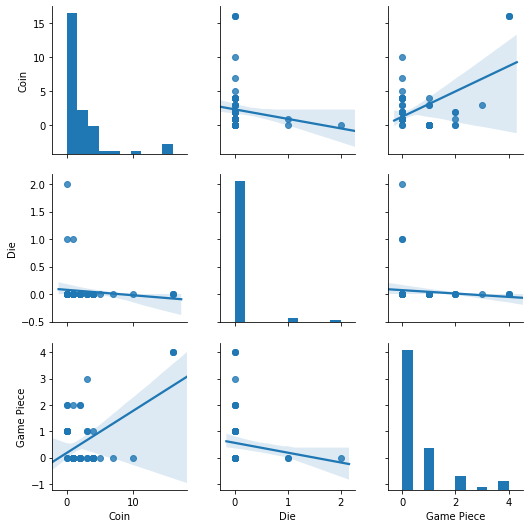

In [83]:
sns.pairplot(gabiigamestuff_k7_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()

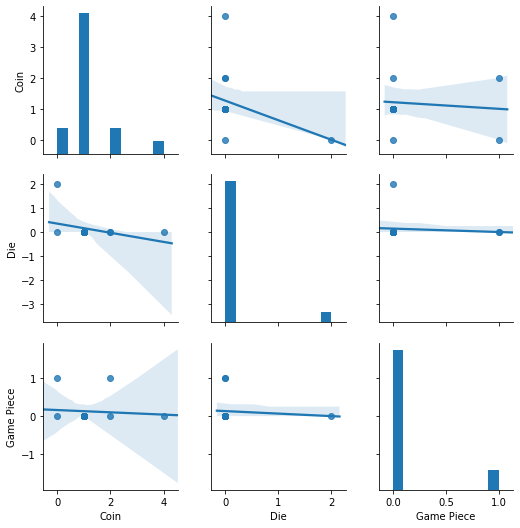

In [84]:
sns.pairplot(gabiigamestuff_class0.drop(['OBJECTID','DESCRIPTIO','Shape_Length','Shape_Area','SU','geometry','cl','cl2','cl3','cl4'], axis=1), kind="reg")
plt.show()